In [2]:
using Plots; pyplot(size=(600,400))
using StatPlots

In [3]:
include("src/CHMM.jl")
using CHMM

In [4]:
KK = 4
DD = 2

model = rand_chmm(KK, DD)
(X, Z, trajptr_full, pairs_full) = rand_trajs(model, 
    T_range=100:200, N_pairs=3_000)
num_trajs = length(trajptr_full) - 1
num_pairs = size(pairs_full, 2)
num_obs = size(X, 2)

901216

In [5]:
trajptr = trajptr_full[1:floor(Int, num_trajs/2)]
pairs = pairs_full[:, floor(Int, num_pairs/2)+1:end]
;

In [ ]:
P_sizes = linspace(0, 1, 6)

In [1]:
pairs

LoadError: [91mUndefVarError: pairs not defined[39m

In [ ]:
pairs[[]]

## EM

In [7]:
curr = chmm_from_data(X, KK)
orig = deepcopy(curr)
suff = ChmmSuffStats(curr)
;

In [11]:
model_ll(model, X, trajptr, pairs), model_ll(curr, X, trajptr, pairs)

(-632339.7486033638, -586008.2930171908)

In [9]:
(curr, loglike_hist) = chmm_em!(curr, suff, X, trajptr, pairs; N_iters=100, verbose=false)
;

iteration      5:  -586730.391
iteration     10:  -585638.808
iteration     15:  -585588.853
iteration     20:  -585586.664



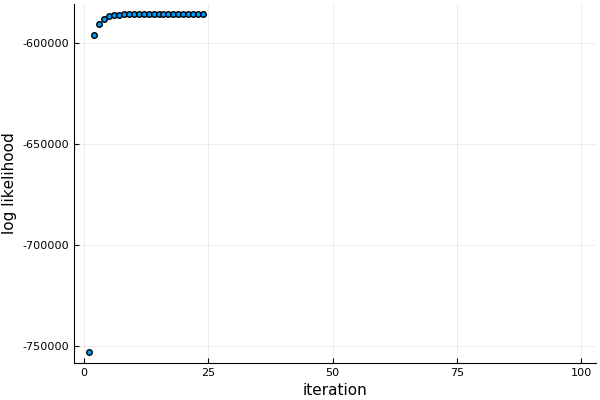

In [10]:
scatter(loglike_hist, legend=false)
ylabel!("log likelihood")
xlabel!("iteration")

In [21]:
@assert all( diff(filter(isfinite, loglike_hist)) .> 0 )


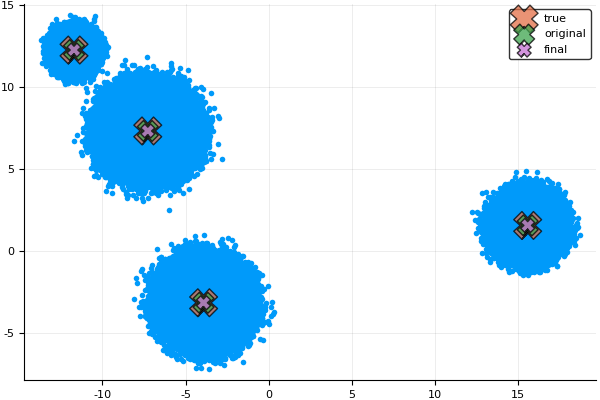

In [8]:
m = hcat(model.μs...)'
mo = hcat(orig.μs...)'
mhat = hcat(curr.μs...)'

scatter(X[1, :], X[2, :], label="", marker=(:circle, stroke(0)))
scatter!(m[:, 1], m[:, 2], marker=:X, ms=20, label="true", alpha=0.75)
scatter!(mo[:, 1], mo[:, 2], marker=:X, ms=15, label="original", alpha=0.75)
scatter!(mhat[:,1], mhat[:, 2], marker=:X, ms=10, label="final", alpha=0.75)

# Analysis

In [12]:
true_to_est = empty(Int, K)
for i in 1:K
    m = model.μs[i]
    r = map(mm -> norm(m .- mm), curr.μs)
    true_to_est[i] = indmin(r)
end
true_to_est_full = vec(outer(true_to_est))
;

LoadError: [91mUndefVarError: empty not defined[39m

## P

In [13]:
#
# factor true dist
#

P_errs = vec(model.P[true_to_est, true_to_est, true_to_est] .- curr.P)
# full
(mean(P_errs), std(P_errs))

LoadError: [91mUndefVarError: true_to_est not defined[39m

In [14]:
histogram(P_errs, bins=50, legend=false, xlabel="error", title="P error")

LoadError: [91mUndefVarError: P_errs not defined[39m

## π₀

In [15]:
p_errs = vec(model.π0[true_to_est] - curr.π0)
(mean(p_errs), std(p_errs))

LoadError: [91mUndefVarError: true_to_est not defined[39m

In [16]:
histogram(p_errs, bins=50, legend=false, xlabel="error", title="π₀ error")

LoadError: [91mUndefVarError: p_errs not defined[39m

## μs

In [17]:
m_errs = vcat([vec((model.μs[true_to_est[i]] .- curr.μs[i])./model.μs[i]) for i in 1:K]...)
(mean(m_errs), std(m_errs))

LoadError: [91mUndefVarError: true_to_est not defined[39m

In [18]:
histogram(m_errs, legend=false, bins=50, title="μ error")

LoadError: [91mUndefVarError: m_errs not defined[39m

## Σs

In [19]:
S_errs = vcat([vec( model.Σs[true_to_est[i]] .- curr.Σs[i] ) for i in 1:K]...)
(mean(S_errs), std(S_errs))

LoadError: [91mUndefVarError: true_to_est not defined[39m

In [20]:
histogram(S_errs, bins=50, legend=false, title="Σ error")

LoadError: [91mUndefVarError: S_errs not defined[39m